### Heart Disease Prediction
This project uses a dataset from the University of California, Irvine

Compared to my other projects, this is going to be very light on the data-wrangling, as I want to focus more on machine learning algorithms and model accuracy comparisons.

We have a dataset with 13 attributes related to heart disease, as well as our target (heart disease vs. no heart disease). We will explore the dataset as is, and look at the relationships between certain variables to get a better understanding of the data. Then we will scale our data and start putting it through various machine learning algorithms. I will lightly explain each one before implementation. 

We'll see which model is the best and test it out with new patient data that the model hasn't seen before.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from IPython.display import Image

import random

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here are the column definitions:
- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type
     - Value 1: typical angina
     - Value 2: atypical angina
     - Value 3: non-anginal pain
     - Value 4: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
     - Value 1: upsloping
     - Value 2: flat
     - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
- num: diagnosis of heart disease (angiographic disease status)
     - Value 0: < 50% diameter narrowing
     - Value 1: > 50% diameter narrowing

Let's take a look at the relationships between the continuous variables and the target (heart disease yes vs. no). Especially since I do not know a lot about columns 2-13.

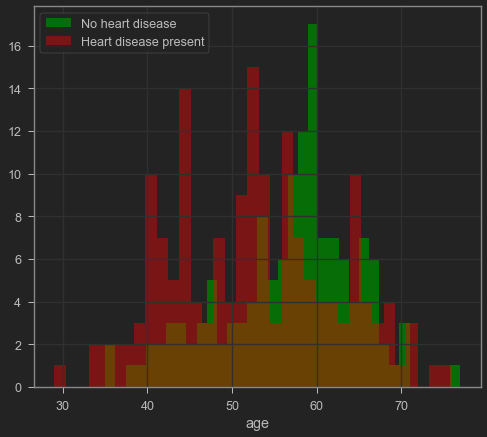

In [5]:
df[df['target'] == 0]['age'].hist(bins=35, color='green', label='No heart disease', alpha=.8)
df[df['target'] == 1]['age'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('age');

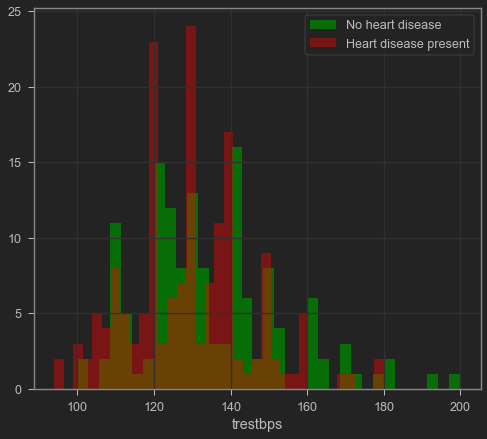

In [6]:
df[df["target"] == 0]['trestbps'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['trestbps'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('trestbps');

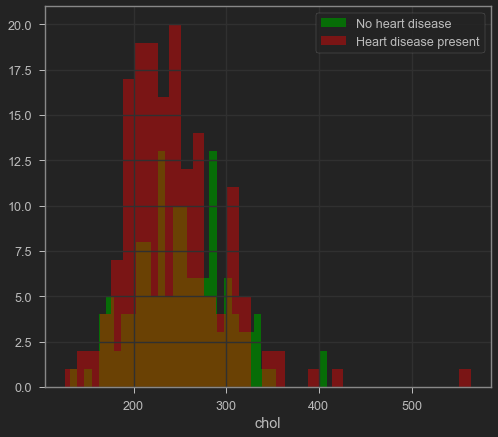

In [7]:
df[df["target"] == 0]['chol'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['chol'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('chol');

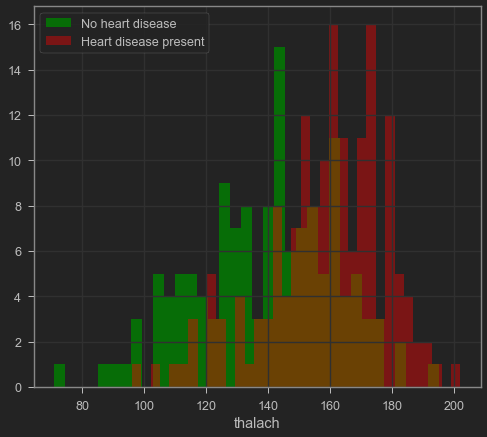

In [8]:
df[df["target"] == 0]['thalach'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['thalach'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('thalach');

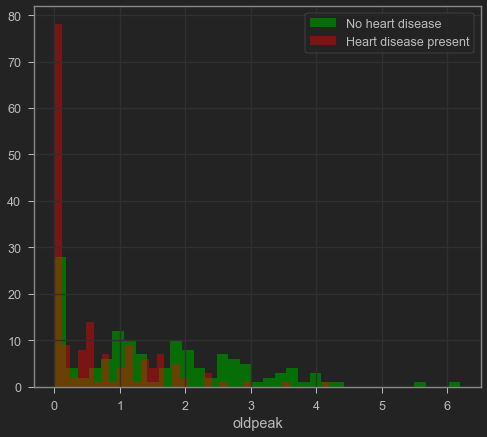

In [9]:
df[df["target"] == 0]['oldpeak'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['oldpeak'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('oldpeak');

#### Key takeaways from continuous variable exploration:
Heart disease is frequently present in the following ranges for these features:
 - trestbps (resting blood pressure) in the 120-140 range
 - chol (cholesterol) 175 & up
 - thalach (max heart rate) 145 and above

Now let's take a look at the categorical variables

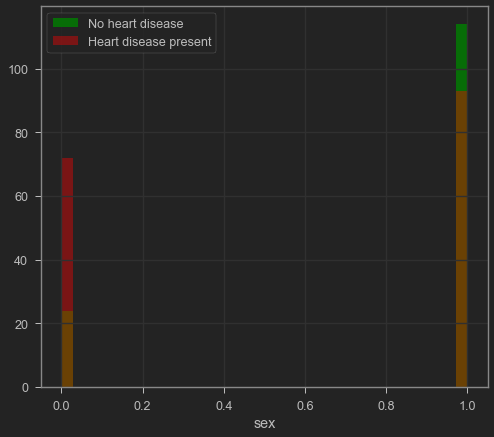

In [10]:
df[df["target"] == 0]['sex'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['sex'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('sex');

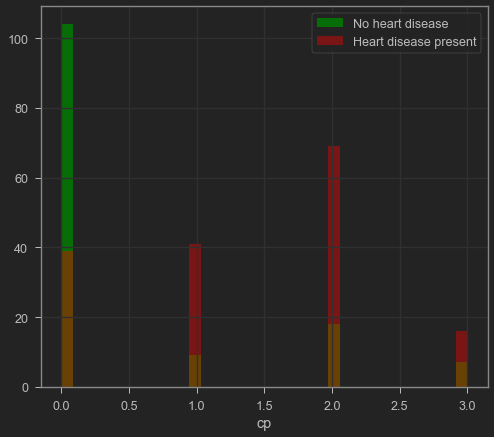

In [11]:
df[df["target"] == 0]['cp'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['cp'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('cp');

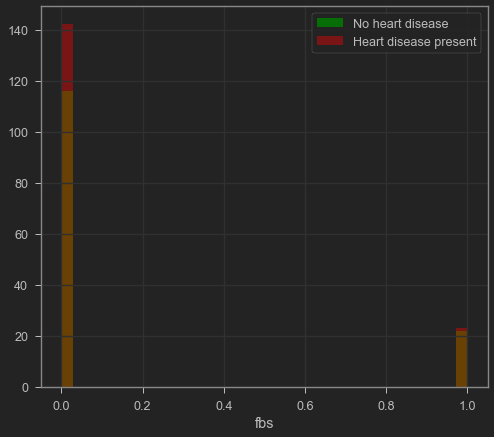

In [12]:
df[df["target"] == 0]['fbs'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['fbs'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('fbs');

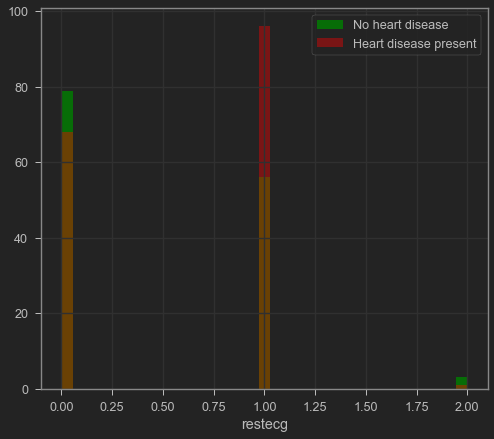

In [13]:
df[df["target"] == 0]['restecg'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['restecg'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('restecg');

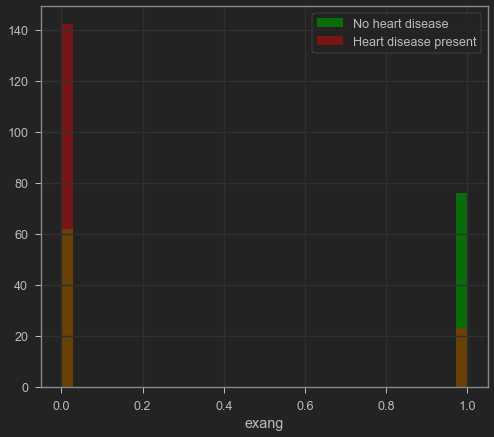

In [14]:
df[df["target"] == 0]['exang'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['exang'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('exang');

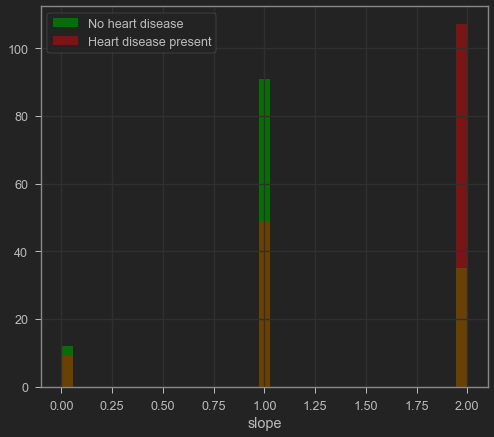

In [15]:
df[df["target"] == 0]['slope'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['slope'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('slope');

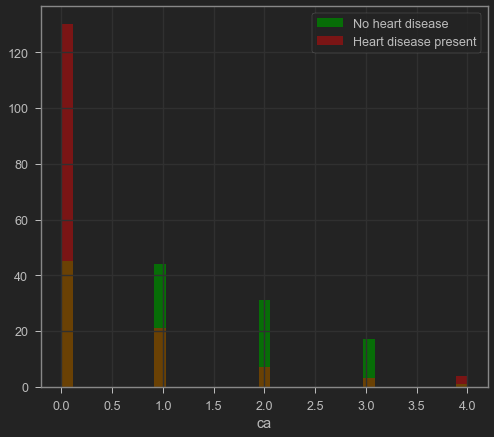

In [16]:
df[df["target"] == 0]['ca'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['ca'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('ca');

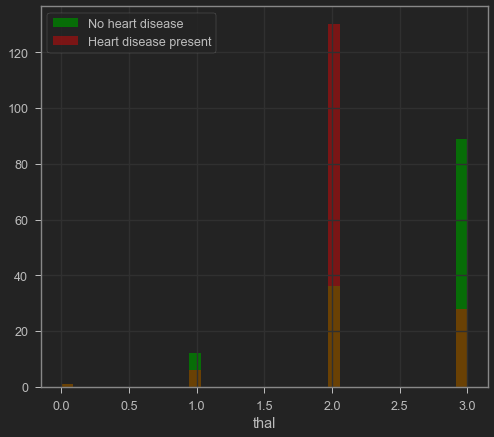

In [17]:
df[df["target"] == 0]['thal'].hist(bins=35, color='green', label='No heart disease', alpha=0.8)
df[df["target"] == 1]['thal'].hist(bins=35, color='red', label='Heart disease present', alpha=0.4)
plt.legend()
plt.xlabel('thal');

#### Key takeaways from categorical variable exploration:
Heart disease is frequently present in the following ranges:
 - cp (chest pain):
     - Value 1: typical angina
     - Value 2: atypical angina
     - Value 3: non-anginal pain *this chest pain type has a small n*
 - restecg (resting electrocardiographic results) = 1 (ST-T Wave abnormality)
 - exang (exercise induced angina) = 0 (no)
 - slope (the slope of the peak exercise ST segment) = 2 (Downslopins: signs of unhealthy heart)
 - ca (number of major vessels colored by flourosopy) = 0
 - thal (thalium stress result) = 2 (fixed defect)

Let's look at the correlation between all variables now.

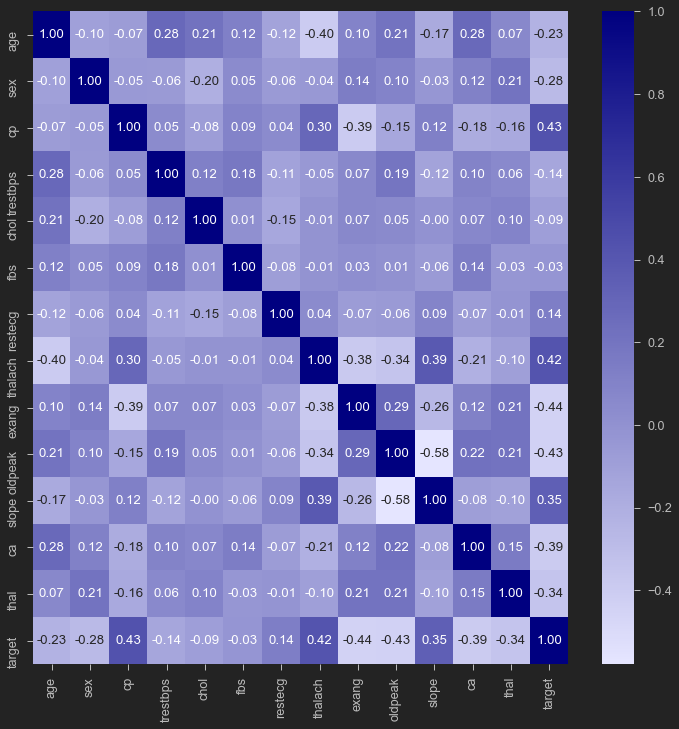

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))
pal = sns.light_palette("navy", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=pal);

The closer to 1 or -1, the stronger the correlation. A couple correlations that catch the eye are:
- thalach & target
- cp & target

It feels like we had just started to get to know our data, and we're already ready to apply some machine learning algorithms. The source of this dataset is https://archive.ics.uci.edu/ml/datasets/Heart+Disease. For a typical project, the majority of the time spent would be getting the data to this point. In this project, we're basically taking the baton form UCI and running to the finish line.

Before we get started, however, we need to scale our data. Scaling data before machine learning is an extremely important step. These machine learning algorithms do not know the context of our data. The example I like to use is compiling a dataset to predict the price of a New York City apartment.

Let's say a 2 bedroom, 2 bathroom, 2000 sq.ft. apartment is \$3000
 - A 2 bedroom, 2 bathroom *1500* sq.ft. apartment is \$2500
 - A 2 bedroom, *1* bathroom 2000 sq.ft. apartment is \$2500
 
In this scenario, we can logically see that 1 bathroom = 500 sq.ft., in terms of price. The machine learning algorithm would see shifts in datapoints potentially in the thousands for square footage, compared to only minior changes in bedrooms and bathrooms. The algorithms would place more weight on square footage, rather than bedrooms and bathrooms. 
 
Essentially, scaling our data would shrink the square footage data to the same range as the bedrooms and bathrooms. So a change in 1 for any field would result in a \$500 impact.

In [19]:
# We only need to scale our continuous fields
SC = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = SC.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.030000e+02,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,0.683168,0.966997,-7.035077e-16,-1.113887e-16,0.148515,0.528053,-6.800574e-16,0.326733,2.345026e-17,1.399340,0.729373,2.313531,0.544554
std,1.001654e+00,0.466011,1.032052,1.001654e+00,1.001654e+00,0.356198,0.525860,1.001654e+00,0.469794,1.001654e+00,0.616226,1.022606,0.612277,0.498835
min,-2.797624e+00,0.000000,0.000000,-2.148802e+00,-2.324160e+00,0.000000,0.000000,-3.439267e+00,0.000000,-8.968617e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,0.000000,-6.638668e-01,-6.814943e-01,0.000000,0.000000,-7.061105e-01,0.000000,-8.968617e-01,1.000000,0.000000,2.000000,0.000000
50%,6.988599e-02,1.000000,1.000000,-9.273778e-02,-1.210553e-01,0.000000,1.000000,1.466343e-01,0.000000,-2.067053e-01,1.000000,0.000000,2.000000,1.000000
75%,7.316189e-01,1.000000,2.000000,4.783913e-01,5.456738e-01,0.000000,1.000000,7.151309e-01,1.000000,4.834512e-01,2.000000,1.000000,3.000000,1.000000
max,2.496240e+00,1.000000,3.000000,3.905165e+00,6.140401e+00,1.000000,2.000000,2.289429e+00,1.000000,4.451851e+00,2.000000,4.000000,3.000000,1.000000


Below is a guide, developed by SAS, which I occasionally use to help me decide which algorithms to try. 
 - We are looking for supervised classification algorithms since we have our target field (heart disease vs. no heart disease). We will be using the following algorithms on our data:
  1. Logistic Regression
  2. Decision Tree
  3. Random Forest
  4. Support Vector Machine
  5. K-Nearest Neighbors
  
I added K-NN to the list because I think this would be an appropriate time to use that classifier, but it didn't make SAS's list. Once again, I will introduce each algorithm and try to provide a visual on how it works. I believe that visualizing the algorithm in some way makes it much easier to understand what's going on.

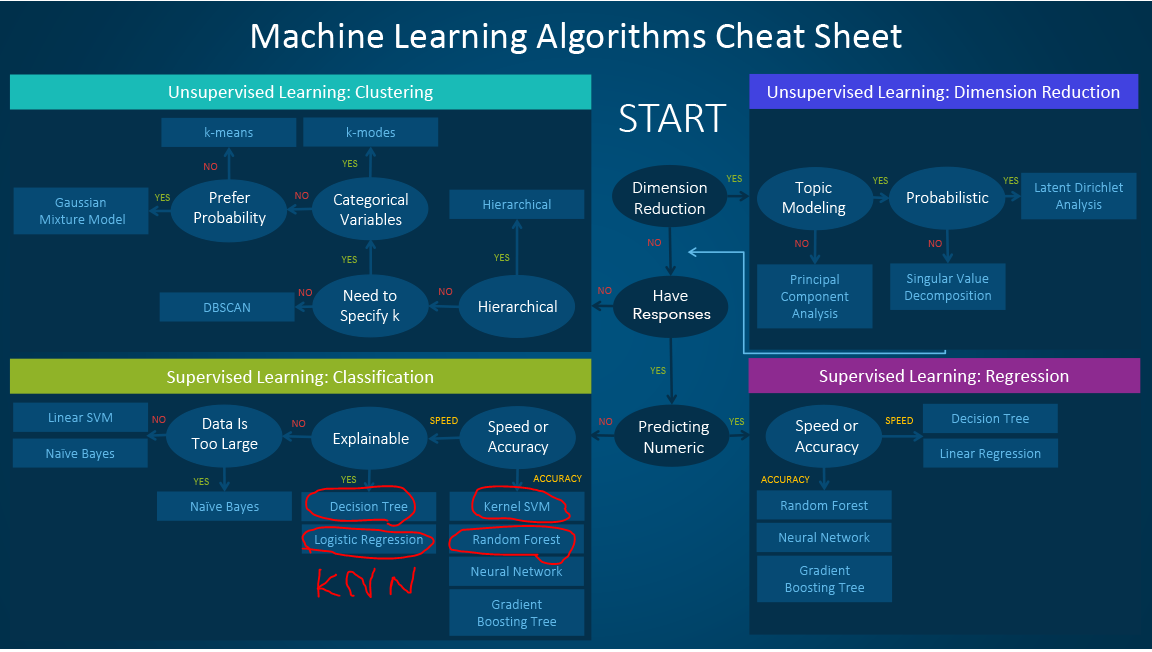

In [22]:
Image(filename='machine-learning-cheat-sheet.png') 

The following terms are going to be used when evaluating each model:
 - Precision: how many are correctly classified among a specific group (heart disease/no heart disease)
 - Recall: How many patients with heart disease did we find out of the total number of patients with heart disease in the dataset
 - F1: Weighted average of precision and recall
 - Support: The number of true examples in the dataset

In [23]:
#Splitting our dataset into testing and training set. 
#As a reminder, this allows the model to learn from the test data. Once that occurs, it applies what it learned to the test set.
X = df.drop('target', axis = 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

## Logistic regression
Logistic regression takes form in the shape of the logistic function "S." The *S* ranges from 0-1 and represents the probability of one of the binary options of the target class. Basically, you're either a 1 (heart disease) or a 0 (no heart disease). This is relatively simple to visualize (below) when the data is simple and there are only 2 target outcomes.

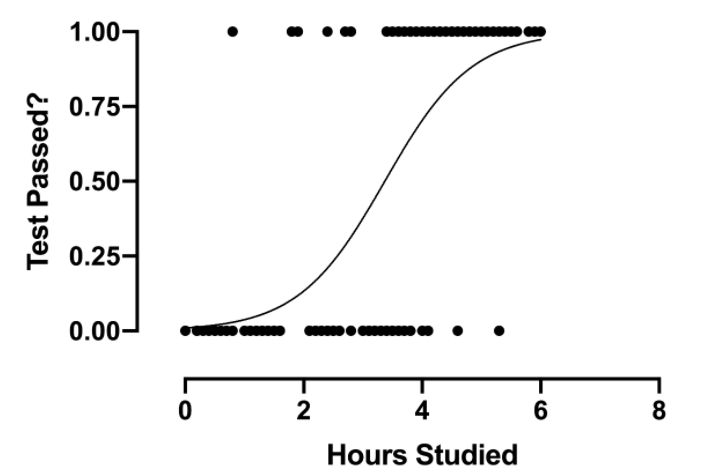

In [24]:
Image(filename='logistic_regression_2D.png') 

When the data has more than 2 targets, or there are numerous features, I like to think of it more like the image below in a 3-D plane. Rather than having that *S* shape divide our dataset by target class, I imagine a sheet, or threshold, that slices through our data to divide the target classes by their features.

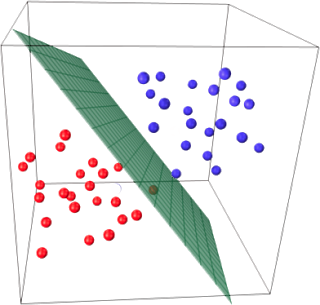

In [25]:
Image(filename='logistic_regression.png') 

In [26]:
#Logistic Regression
log_reg = LogisticRegression(solver='liblinear') #liblinear is used for smaller datasets
log_reg.fit(X_train, y_train)

lr_pred = log_reg.predict(X_test)
print(classification_report(y_test, lr_pred, target_names = ['No heart disease', 'Heart disease Present']))
print('\n Accuracy: ' + '{:.2%}'.format(accuracy_score(y_test, lr_pred)))

                       precision    recall  f1-score   support

     No heart disease       0.84      0.81      0.83        47
Heart disease Present       0.80      0.84      0.82        44

             accuracy                           0.82        91
            macro avg       0.82      0.82      0.82        91
         weighted avg       0.83      0.82      0.82        91


 Accuracy: 82.42%


#### 82% isn't too bad. Logistic regression can be a little too rigid sometimes, and can often be replaced by other algorithms. There are also scenarios where, based on how logistic regression operates, it simply can't calculate a line or *S* curve to include appropiate classes. I will explain a bit more after we look at decision trees.

## Decision Trees
Decision trees are exactly what they sound like. It's basically branching logic that is used to determine the target class. I think the best way to visualize this is to actually use this algorithm so we can view how it worked.

In [27]:
#Decision Trees
Dtree = DecisionTreeClassifier(random_state=40)
Dtree.fit(X_train, y_train)

tree_pred = Dtree.predict(X_test)
print(classification_report(y_test, tree_pred, target_names = ['No heart disease', 'Heart disease Present']))
print('\n Accuracy: ' + '{:.2%}'.format(accuracy_score(y_test, tree_pred)))

                       precision    recall  f1-score   support

     No heart disease       0.80      0.74      0.77        47
Heart disease Present       0.74      0.80      0.77        44

             accuracy                           0.77        91
            macro avg       0.77      0.77      0.77        91
         weighted avg       0.77      0.77      0.77        91


 Accuracy: 76.92%


In [28]:
export_graphviz(
            Dtree,
            out_file =  "DecisionTree.dot",
            feature_names = df.drop('target', axis = 1).columns,
            class_names = ['No heart disease', 'Heart disease Present'],
            filled = True,
            rounded = True)

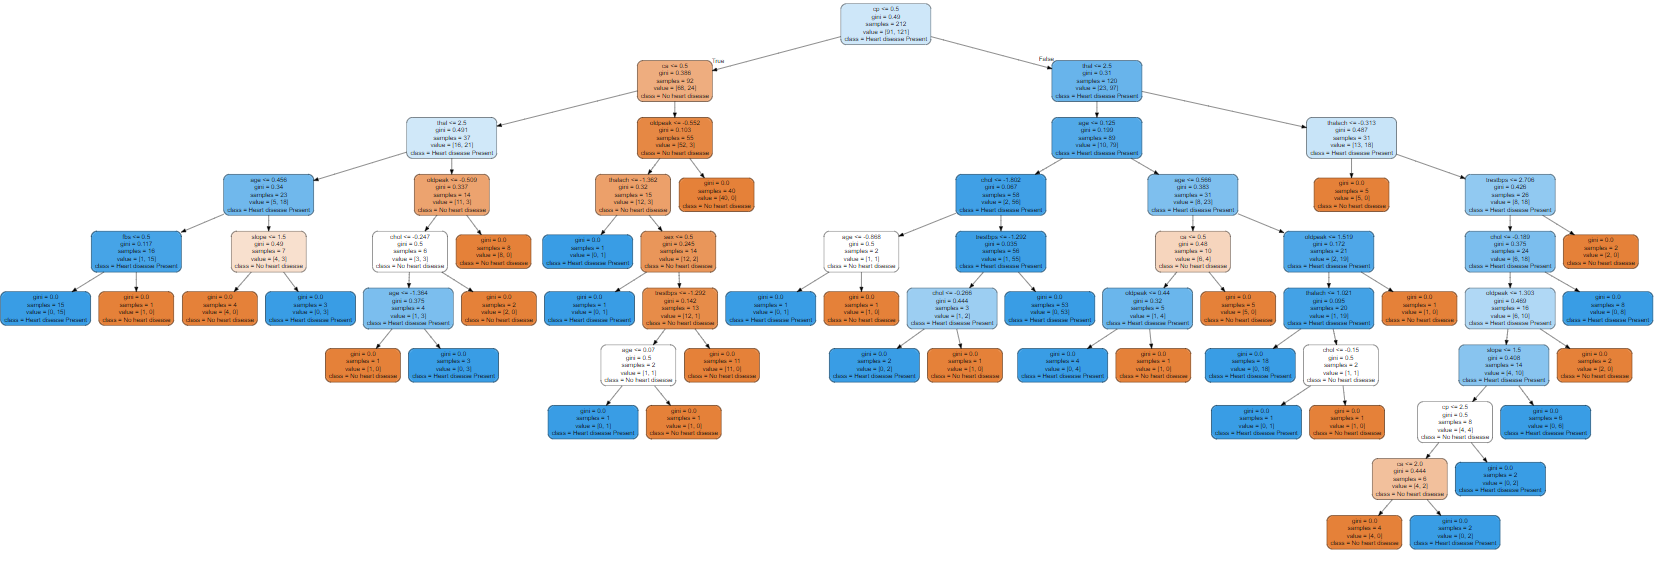

In [29]:
#Full decision tree
Image(filename='DecisionTreeAll.png') 

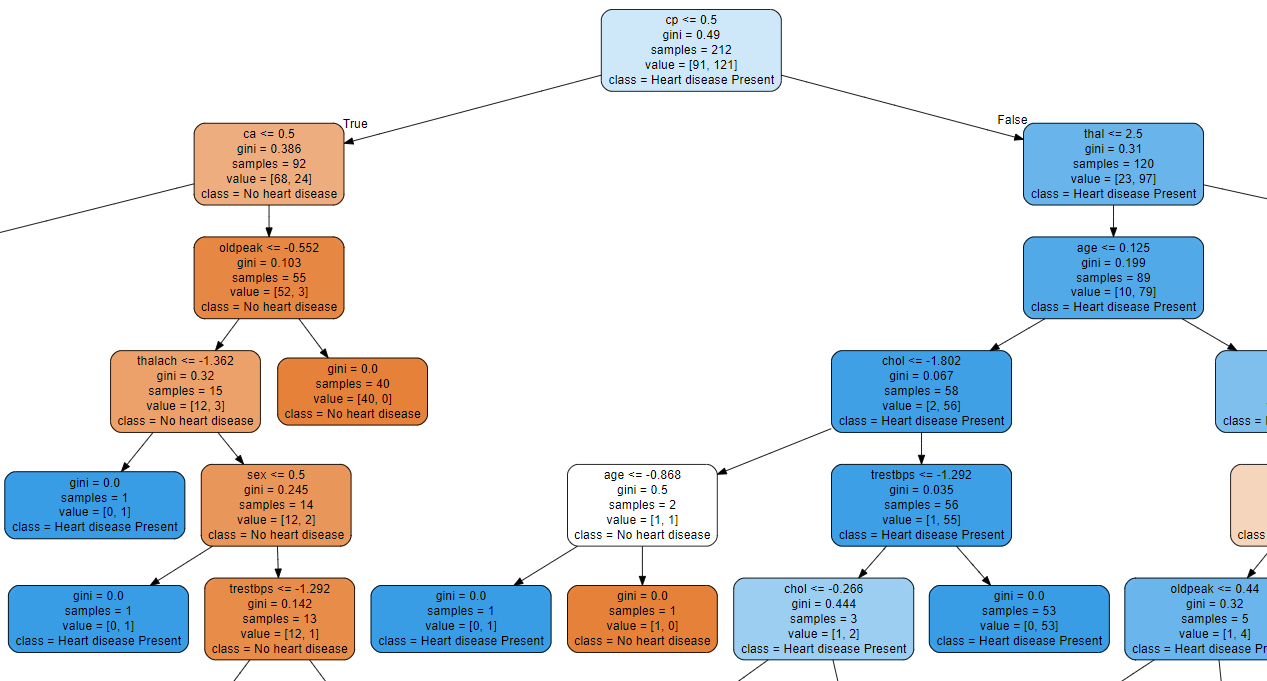

In [30]:
#Small section of decision tree
Image(filename='DecisionTreeSection.png') 

It should be fairly easy to understand how the decision tree works now. It figures out threshold combinations to eventually make a decision on whether or not the patient has heart disease. It's essentially a chain of if-else logic.

#### We only got ~77% by usng a decision tree. There are better algorithms to use, but if you needed a white box solution, this is potentially the way to go. A white box means that we can clearly see and interpret how the algorithm works and makes its decisions. Decision trees also don't require as much work on the raw data. For instance, trees don't use euclidean distance in their decision making, so we don't need to scale or normalize our data. Overall, its not the best solution for this dataset/problem, but it's always interesting to look under the hood of how certain models function.

To circle back to logistic regression quickly, we can see how a decision tree is much more flexible that the regression curve. Decision trees have all of these branches and thresholds while logistic regression just has one line to try and capture the best fit.

## Random Forest
Now that we understand a decision tree and how it works, we will move on to random forests. A random forest is a combination (ensemble) of decision trees. You can see below that we are going to use 1000 trees. Then, out of the 1000 trees, whichever target class has the majority is the voted final class.

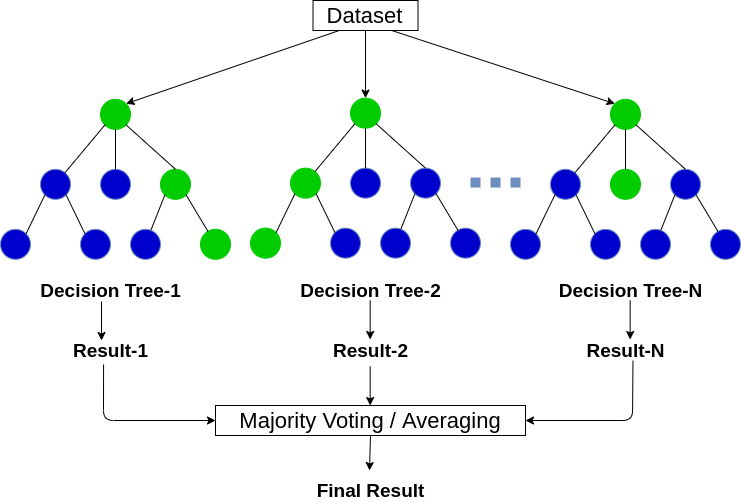

In [31]:
#Random forest example
Image(filename='RandomForest.png') 

In [32]:
rand_for = RandomForestClassifier(n_estimators=1000, random_state=31)
rand_for.fit(X_train, y_train)

rf_pred = rand_for.predict(X_test)
print(classification_report(y_test, rf_pred, target_names = ['No heart disease', 'Heart disease Present']))
print('\n Accuracy: ' + '{:.2%}'.format(accuracy_score(y_test, rf_pred)))

                       precision    recall  f1-score   support

     No heart disease       0.93      0.83      0.88        47
Heart disease Present       0.84      0.93      0.88        44

             accuracy                           0.88        91
            macro avg       0.88      0.88      0.88        91
         weighted avg       0.88      0.88      0.88        91


 Accuracy: 87.91%


#### Random forests have a lot of the same benefits as decision trees. However, this took significantly more processing time since it's creating 1000 decision trees. It's also not as easy to explore under the hood as it is for decision trees. But in this case the output speaks for itself. 87.91% accuracy is much better than both logistic regression and the decision tree.

## Support Vector Machines
My favorite explaination and visual for support vector machines are from this Reddit thread:
https://www.reddit.com/r/MachineLearning/comments/15zrpp/please_explain_support_vector_machines_svm_like_i/

Basically we have our plots graphed and we need to find a line to best separate the groups. The support vectors are the points that provide the most insight. Many of the red and blue dots below don't help to figure out where the line should go. The points that help guide the line are considered the support vectors.

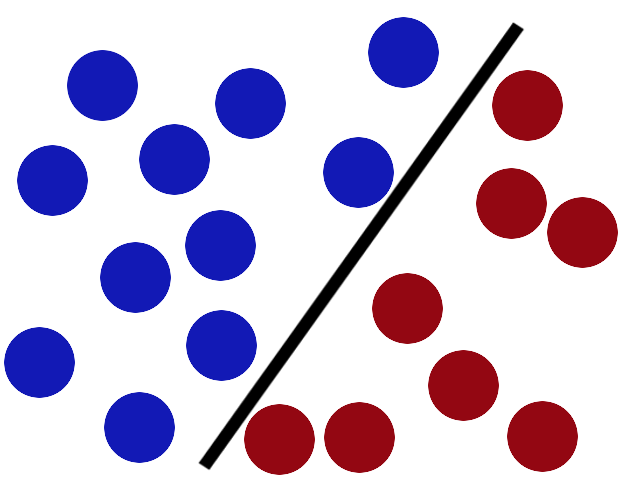

In [33]:
Image(filename='SVM1.png') 

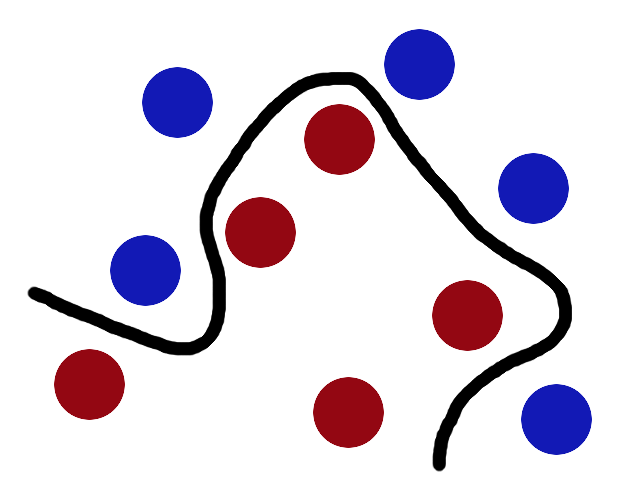

In [34]:
Image(filename='SVM2.png') 

In [35]:
#Support Vector Machines
svm_model = SVC(kernel='rbf', gamma = 0.1, C = 1.0)
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
print(classification_report(y_test, svm_pred, target_names = ['No heart disease', 'Heart disease Present']))
print('\n Accuracy: ' + '{:.2%}'.format(accuracy_score(y_test, svm_pred)))

                       precision    recall  f1-score   support

     No heart disease       0.89      0.83      0.86        47
Heart disease Present       0.83      0.89      0.86        44

             accuracy                           0.86        91
            macro avg       0.86      0.86      0.86        91
         weighted avg       0.86      0.86      0.86        91


 Accuracy: 85.71%


#### While 85.71% is certainly substantial, especially compared to decision trees, this could have easily dropped 10% depending on our data. SVM has its time and place, and it appears that this was a reasonably appropriate time to use it. SVM doesn't work well with huge datasets or with data with a scattered target class. How do you draw that 'line' when there are numerous overlapping points with different target classes? 

## K-Nearest Neighbor
In my *User Authentication Exploration* project I used K-means clustering. This can be conceptualized similarly. Basically, we look for the *k* closest datapoints to the point we're looking at, and use them to determine the target class for the new point. If a new datapoint had 3 very close 'neighbors' on a graph with the same target class, KNN will apply that same target class to the new point.

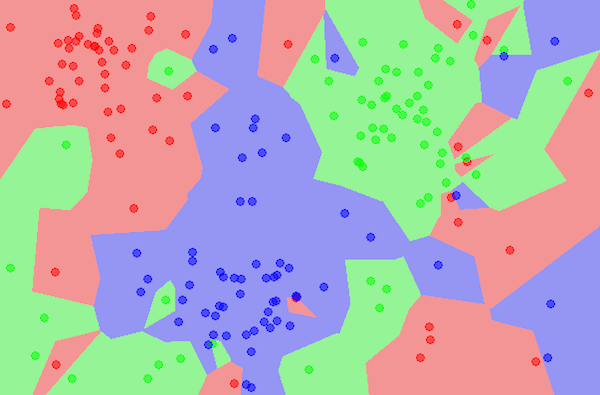

In [36]:
Image(filename='knn.png') 

KNN requires an additional step before we can train our model. We need to know how many neighbors to look for. As mentioned earlier, I went through a similar process in a past project so I won't go into too much detail here. Just remember that we're looking for the 'elbow' of the graph to determine an appropriate amount for *k*.

In [37]:
#Getting the error rate and accuracy for each model with K ranging from 1-20
err = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    err.append(np.mean(pred_i != y_test))

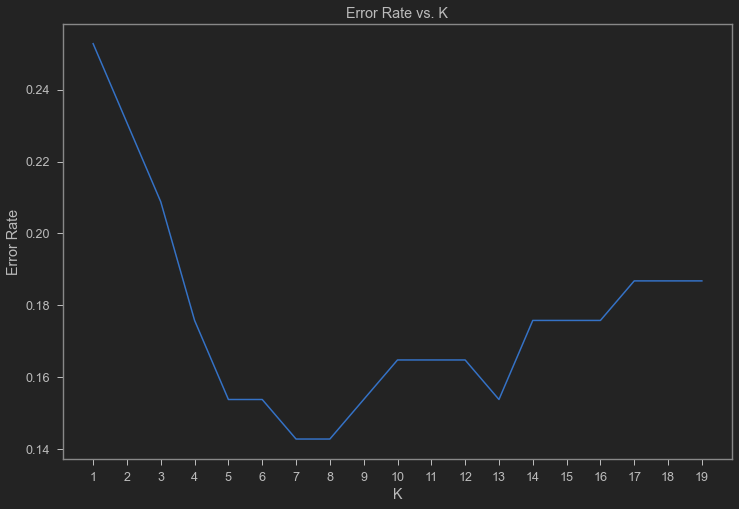

In [38]:
plt.figure(figsize=(12,8))
plt.plot(range(1,20), err)
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1,20));

It looks like 7 or 8 would be the most appropriate choice. I'm going to go with 7 since they appear to be identical. That way, we have a higher chance of avoiding overfitting our data in the future.

In [39]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred, target_names = ['No heart disease', 'Heart disease Present']))
print('\n Accuracy: ' + '{:.2%}'.format(accuracy_score(y_test, knn_pred)))

                       precision    recall  f1-score   support

     No heart disease       0.89      0.83      0.86        47
Heart disease Present       0.83      0.89      0.86        44

             accuracy                           0.86        91
            macro avg       0.86      0.86      0.86        91
         weighted avg       0.86      0.86      0.86        91


 Accuracy: 85.71%


#### Another reasonable accuracy score. KNN has its advantages as well. It's a bit more flexible since it doesn't actually use the test data to 'learn.' Remember, all it's doing is plotting the points and finding the closest neighbors. However, since that is the KNN process, which uses euclidian distances, it is sensitive to outliers and noise. KNN also falls short when it has a dataset with a high dimensiality. But, as we can see here, this was a good use case for KNN.

In [40]:
print('Logistic Regression: ' + '{:.2%}'.format(accuracy_score(y_test, lr_pred)))
print('Random Forest: ' + '{:.2%}'.format(accuracy_score(y_test, rf_pred)))
print('Decision Tree: ' + '{:.2%}'.format(accuracy_score(y_test, tree_pred)))
print('Support Vector Machine: ' + '{:.2%}'.format(accuracy_score(y_test, svm_pred)))
print('K-Nearest Neighbors: ' + '{:.2%}'.format(accuracy_score(y_test, knn_pred)))

Logistic Regression: 82.42%
Random Forest: 87.91%
Decision Tree: 76.92%
Support Vector Machine: 85.71%
K-Nearest Neighbors: 85.71%


Random forest, SVM, and KNN definitely out-performed logistic regression and decision tree here. They should all perform similarly in the following scenario, but we know that the random forest would be our most accurate long-term solution.

### Scenario
Putting these models together and getting their accuracy is great. But at the end of the day, these are just numbers unless we can find a real-world scenario in which we can use the model to benefit us in some way. 

Let's suppose we work for a cardiology specialist. We want to identify a cohort of high risk patients who will need extra time with the physician for each appointment. Prior to the appointment, patients are asked to get blood work and other readings, and have the results sent to the office ahead of time. With our model, we can enter the patient's information and determine if they are high risk for heart disease or not, and schedule him/her for extra face time with the physician.

Let's make a function that takes user input (for our 13 features) and determines if the patient is high risk or now.
We will, of course, use our random forest model since it achieved almost 88% accuracy.

In [42]:
def determineRisk (patient_datapoints):
    datapoints = {
        'age': patient_datapoints[0],
        'sex': patient_datapoints[1],
        'cp': patient_datapoints[2],
        'trestbps': patient_datapoints[3],
        'chol': patient_datapoints[4],
        'fbs': patient_datapoints[5],
        'restecg': patient_datapoints[6] ,
        'thalach':  patient_datapoints[7],
        'exang': patient_datapoints[8],
        'oldpeak': patient_datapoints[9],
        'slope': patient_datapoints[10],
        'ca': patient_datapoints[11],
        'thal': patient_datapoints[12]
    }
    patient_data = pd.DataFrame([datapoints])
    patient_prediction = rand_for.predict(patient_data)
    
    return('Patient flagged high risk for Heart Disease' if patient_prediction == 1 else 'Patient not high risk')

In [43]:
#Since we know our targets for our test data, we'll test a few and see how it works
#df.iloc[0].values.tolist() #Target = 1
determineRisk(df.iloc[0].values.tolist())

'Patient flagged high risk for Heart Disease'

In [44]:
#df.iloc[209].values.tolist() #Target = 0
determineRisk(df.iloc[209].values.tolist())

'Patient not high risk'

Now our function works properly. I don't have a lot of clinical context for these measurements, so I will use this to compile a list of random data for a patient.

In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.030000e+02,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,4.690051e-17,0.683168,0.966997,-7.035077e-16,-1.113887e-16,0.148515,0.528053,-6.800574e-16,0.326733,2.345026e-17,1.399340,0.729373,2.313531,0.544554
std,1.001654e+00,0.466011,1.032052,1.001654e+00,1.001654e+00,0.356198,0.525860,1.001654e+00,0.469794,1.001654e+00,0.616226,1.022606,0.612277,0.498835
min,-2.797624e+00,0.000000,0.000000,-2.148802e+00,-2.324160e+00,0.000000,0.000000,-3.439267e+00,0.000000,-8.968617e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,0.000000,-6.638668e-01,-6.814943e-01,0.000000,0.000000,-7.061105e-01,0.000000,-8.968617e-01,1.000000,0.000000,2.000000,0.000000
50%,6.988599e-02,1.000000,1.000000,-9.273778e-02,-1.210553e-01,0.000000,1.000000,1.466343e-01,0.000000,-2.067053e-01,1.000000,0.000000,2.000000,1.000000
75%,7.316189e-01,1.000000,2.000000,4.783913e-01,5.456738e-01,0.000000,1.000000,7.151309e-01,1.000000,4.834512e-01,2.000000,1.000000,3.000000,1.000000
max,2.496240e+00,1.000000,3.000000,3.905165e+00,6.140401e+00,1.000000,2.000000,2.289429e+00,1.000000,4.451851e+00,2.000000,4.000000,3.000000,1.000000


In [46]:
rand_data = []
for column in df.columns:
    rand_datapoint = random.choice(df[column])
    rand_data.append(rand_datapoint)
    
print(rand_data)
print('\n' + determineRisk(rand_data))

[1.8345072140324588, 1, 0, 0.47839125242290675, -0.9907020349072007, 0, 0, 0.9775138938257651, 0, -0.8968617158532323, 2, 1, 3, 0]

Patient not high risk


In [48]:
rand_data = []
for column in df.columns:
    rand_datapoint = random.choice(df[column])
    rand_data.append(rand_datapoint)
    
print(rand_data)
print('\n' + determineRisk(rand_data))

[-1.4741575827046542, 1, 3, 2.762907398745065, 0.5360110668486521, 0, 0, 0.8900528839839795, 1, -0.6380530492784424, 2, 0, 2, 1]

Patient flagged high risk for Heart Disease


#### Now we have a working function to screen patients for heart disease risk prior to appointment. I'm sure there are tons of real world scenarios where a model like this could be used. My intention for this project was to not only showcase several types of supervised learning techniques, but also to show how we can go from a simple dataset to a reliable model and function which can be implemented into an everyday workflow. A model is just a model until there's a use case for it that can benefit somebody or some organization.